# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [2]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-12 11:07:00--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd64e45cb1a4e8281e322fa299c.dl.dropboxusercontent.com/cd/0/inline/CQ6i5Fe_2yfJZQtjOGyNrQT4vVZdxDubWF7TVJmIG2TDKvrGer8Ic2BKy_xn_Li0nf8IUtenoiPEBh3657TO5PHWLSQeG3MQ6xdBYDGn_FENWdqa3tNMhi-nRBkp4HbTmj01fWizR656LZFarQ6uADAT/file# [following]
--2024-04-12 11:07:00--  https://ucd64e45cb1a4e8281e322fa299c.dl.dropboxusercontent.com/cd/0/inline/CQ6i5Fe_2yfJZQtjOGyNrQT4vVZdxDubWF7TVJmIG2TDKvrGer8Ic2BKy_xn_Li0nf8IUtenoiPEBh3657TO5PHWLSQeG3MQ6xdBYDGn_FENWdqa3tNMhi-nRBkp4HbTmj01fWizR656LZFarQ6uADAT/file
Resolving ucd64e45cb1a4e8281e322fa299c.dl.dropboxusercontent.com (ucd64e45cb1a4e8281e322fa299c.dl.dropboxusercontent.com)... 162.125.1.15, 2620:1

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [3]:
file_path = '/HousingData.csv'

data = pd.read_csv(file_path)
print(data.head())

data = data.fillna(data.mean())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


Get a brief description of the dataset

In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [5]:
X = data.drop('MEDV', axis=1).values

print(type(X))
print(X)

<class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

<Axes: >

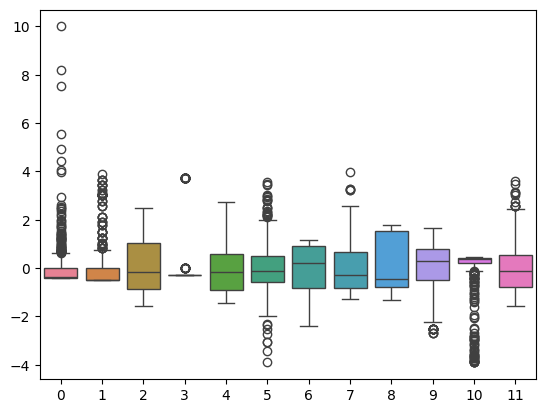

In [6]:
# sns.boxplot(data=pd.DataFrame(X)) # Before scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sns.boxplot(data=pd.DataFrame(X_scaled)) # After scaling

add polynomial features to increase model complexity!



In [7]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [8]:
y = data['MEDV'].values

print(type(y))
print(y)

<class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36



Split the dataset into two parts such that the training set contains 80% of the samples.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

[ 6.71326437e-15  2.61543210e+00  8.23937159e-01  2.71362629e-01
 -3.48211983e+00 -1.29409137e+00  3.44585661e+00 -1.21943076e+00
 -1.81707978e+00 -1.35705037e+00 -7.62724086e-01  9.41284776e-02
 -3.26790109e+00  1.88815533e-01 -2.12293611e+00  3.27201664e+00
  2.99592944e+00 -2.33583776e+00  3.47631370e-01  2.08741825e-01
  2.21883471e+00 -2.33322440e+00 -2.04447912e+00  7.41756805e-03
  1.19322150e+00 -8.41126027e-02  1.01385910e-01  2.74709658e-01
 -2.78021092e+00 -1.52798130e-01  7.61588328e-01 -1.08630659e+00
  2.97124880e+00 -2.68640233e-01 -3.02213841e+00 -1.60704564e+00
  1.31321171e+00 -3.11014224e-01 -5.10197825e-01  1.28252455e+00
  1.32809034e+00  1.38205448e+00 -6.50905063e-01 -1.06080996e+00
  7.72225398e-01 -5.06351131e-01  1.37177961e+00 -1.08949576e+00
 -9.50138209e-01 -4.45437289e-01 -1.69626905e+00  5.47158139e-01
 -1.88581634e-01  6.91851939e-03 -4.71226094e-01 -3.79170284e-01
 -1.24093403e+00  3.76740641e-01  3.63408849e+00  1.95669949e+00
 -2.07628197e+00 -4.87583

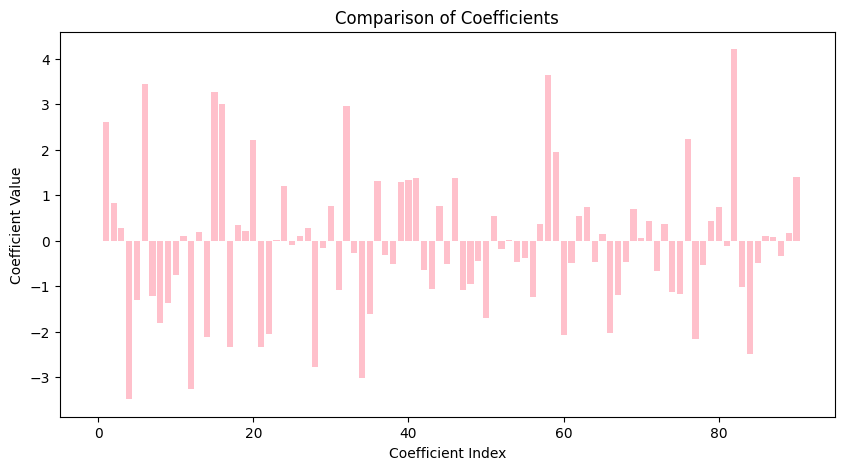

In [11]:
coefficients = lr.coef_
print(coefficients)
plt.figure(figsize=(10, 5))
plt.bar(range(len(coefficients)), coefficients, color='pink')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients')
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [12]:
r2_train = r2_score(y_train, lr.predict(X_train))
mse_train = mean_squared_error(y_train, lr.predict(X_train))
print('R² score on the training dataset:', r2_train)
print('MSE on the training dataset', mse_train)

R² score on the training dataset: 0.9233615957926449
MSE on the training dataset 6.65783903781899


Predict the value of "y" for each "x" belonging to the "testing" set

In [13]:
y_pred = lr.predict(X_test)

r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)

# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [14]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

[ 0.         -0.          0.         -0.          0.         -0.
  2.71044561 -0.         -0.         -0.17551806 -0.87919831  0.
 -3.61571562 -0.09172222  0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.21657471 -0.
 -0.          0.         -0.          0.09712834  0.          0.
 -0.         -0.20798319 -0.1485112  -0.          0.         -0.
 -0.          0.         -0.          0.7562266  -0.          0.
 -0.85199921 -0.59720675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.26961623  0.          0.         -0.
 -0.8353172   0.         -0.         -0.         -0.24304235 -0.
  0.46962857]


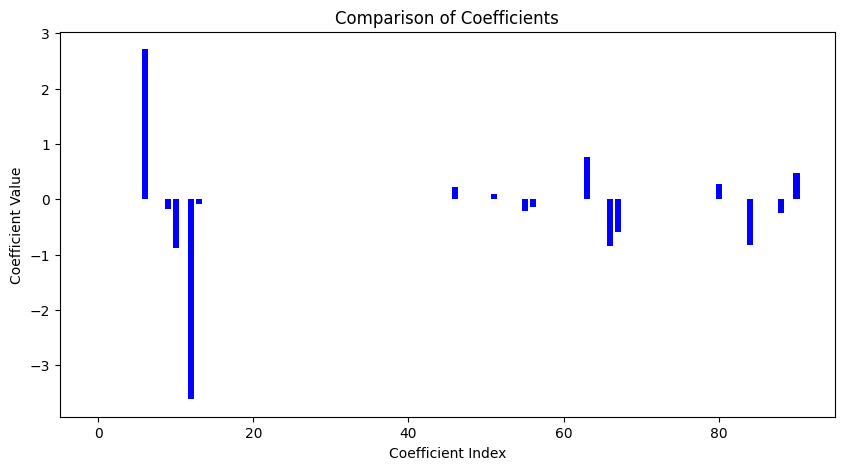

In [15]:
lasso_coefficients = lasso.coef_
print(lasso_coefficients)
plt.figure(figsize=(10, 5))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients, color='blue')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients')
plt.show()

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

1. The sparsity the coefficients has increased. This means that Lasso regularization has reduced many coefficients to zero. So some of the features has been removed from the model. The zeroing out of some coefficients is kind of automatic feature selection. The coefficients that remain non-zero have smaller absolute values compared to the unregularized model.

2. Increasing the alph will increase the penalty on the coefficients, leads to more coefficients being zero. When alpha increases, the model becomes more sparse, this can lead to underfitting the model. Decreasing alpha reduces the power of the regularization. If alpha is too small, the regularization might not be effective enough to prevent overfitting or to produce a good sparse model. There's an optimal range for alpha that has the best trade-off between bias and variance.


Get the score value on train *dataset*


In [16]:
r2_train_lasso = r2_score(y_train, lasso.predict(X_train))
mse_train_lasso = mean_squared_error(y_train, lasso.predict(X_train))
print('R² score on the training dataset:', r2_train_lasso)
print('MSE on the training dataset', mse_train_lasso)

R² score on the training dataset: 0.8171286694481938
MSE on the training dataset 15.88665494849732


Predict the value of "y" for each "x" belonging to the "testing" set

In [17]:
y_pred_lasso = lasso.predict(X_test)

r2_test_lasso = r2_score(y_test, y_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_lasso)

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [18]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

Get the coefficients of the variables and visualize it.

[ 0.          0.05912156  0.51116396 -0.28467561 -0.32455353 -0.85827735
  3.30888276 -1.15903729 -1.59593251 -0.53180157 -0.91042787  0.42828162
 -2.94077889  0.16087076 -0.2517118   0.62754054  1.60530016 -1.09008989
  0.19857273 -0.21466179  0.91315274 -0.33329639 -0.37069977 -0.0685445
  0.53227529  0.13451302  0.04174477  0.21402759 -0.19753069 -0.13818418
  0.11128147 -0.41118718  0.69356948 -0.05349153 -0.33153368 -0.6523907
  0.65774546  0.00626011  0.17510478  0.56882038  0.84405893  0.75253857
 -0.01735362 -0.74138428  0.38541275 -0.84892644  0.44774634 -0.95605317
 -0.87633987 -0.11780543 -0.84245313  0.77371237 -0.05986682 -0.05282303
 -0.5612907  -0.35054369 -1.10824908 -0.28920456  0.95796985  0.161939
 -0.72743981 -0.23024552  0.59678367  0.61007814 -0.35547651  0.25507285
 -1.39082276 -1.30777268 -0.34506817  0.43935663  0.18768566  0.33640313
  0.12071674  0.17082987 -0.88889616 -0.93434533  1.1011708  -0.55229718
 -0.01954442 -0.25679014  0.78714857  0.62433033  1.952

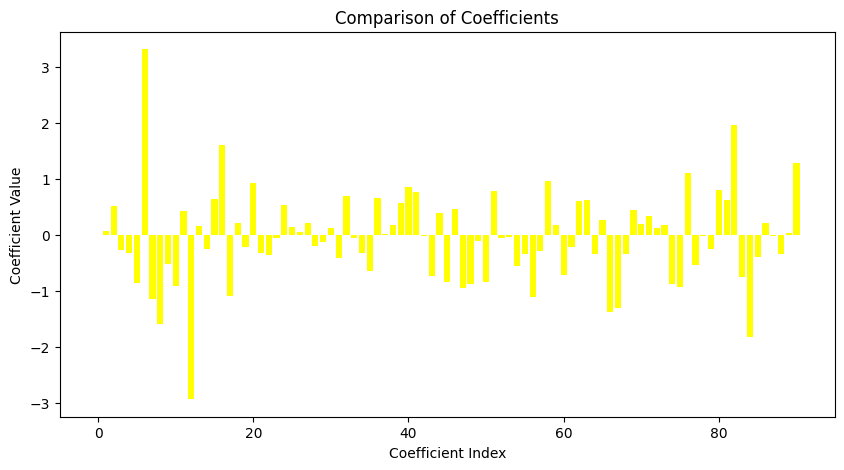

In [19]:
ridge_coefficients = ridge.coef_
print(ridge_coefficients)
plt.figure(figsize=(10, 5))
plt.bar(range(len(ridge_coefficients)), ridge_coefficients, color='yellow')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Comparison of Coefficients')
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

1. L1 regularization has more sparsity in the coefficients, which means some coefficients become zero. But not the same thing in L2 regularization, where coefficients can be very small but not zero. Both L1 and L2 regularizations decrease the coefficients, but L2 regularization does it more evenly among the features. L1 regularization can be used for feature selection because it can zero out some coefficients. L2 regularization is more about feature weighting, assigning a small weight to less important features but still keeping them in the model.

2. Unlike L1, the Ridge regularization decrease the magnitude of the coefficients more uniformly and does not zero out coefficients. However, it will still reduce the magnitude of the coefficients with larger alphas, which in turn reduces the model's sensitivity to changes in the variables. Increasing alpha in Ridge regression increases the penalty on the coefficients magnitude. This means that as alpha gets larger, the coefficients are pushed closer to zero, which decreases the model's complexity. Too big alpha can lead to bias in the model. Decreasing alpha reduces the impact of the regularization, thus the coefficients be larger. When alpha is too low, model may overfit the training data.

Get the score value on train *dataset*

In [20]:
r2_train_ridge = r2_score(y_train, ridge.predict(X_train))
mse_train_ridge = mean_squared_error(y_train, ridge.predict(X_train))
print('R² score on the training dataset:', r2_train_ridge)
print('MSE on the training dataset', mse_train_ridge)

R² score on the training dataset: 0.9143940529441623
MSE on the training dataset 7.4368800090845655


Predict the value of "y" for each "x" belonging to the "testing" set



In [21]:
y_pred_ridge = ridge.predict(X_test)

r2_test_ridge = r2_score(y_test, y_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [22]:
performance_summary = pd.DataFrame({
    'Model': ['Basic Regression', 'Lasso Regression', 'Ridge Regression'],
    'MSE (Test)': [mse_test, mse_test_lasso, mse_test_ridge],
    'MSE (Train)': [mse_train, mse_train_lasso, mse_train_ridge],
    'R² Score (Test)': [r2_test, r2_test_lasso, r2_test_ridge],
    'R² Score (Train)': [r2_train, r2_train_lasso, r2_train_ridge]
})

print(performance_summary)

              Model  MSE (Test)  MSE (Train)  R² Score (Test)  \
0  Basic Regression   18.122077     6.657839         0.752882   
1  Lasso Regression   16.227427    15.886655         0.778718   
2  Ridge Regression   15.110037     7.436880         0.793955   

   R² Score (Train)  
0          0.923362  
1          0.817129  
2          0.914394  


 *Which model performed best on the test data?</br>
Why the results on train data are different? </br>
Discuss why this might be the case.*

Ridge regression performed best on the test data. The basic regression is overfitting the training data, which leads to great training performance but bad test performance. Lasso and Ridge  prevent overfitting by penalizing the size of the coefficients, leading to models that generalize better but have higher MSE on the training data because of regularization term. So basic regression is doing great on training data because it is overfiting to the data.    